<a href="https://colab.research.google.com/github/tusharpemsmw/autumn-2024/blob/main/tushar_2125051098_7B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_dir = '/content/drive/MyDrive/ML/Dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 118s 7s/step - accuracy: 0.2870 - loss: 1.4317 - val_accuracy: 0.2875 - val_loss: 1.4011
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.3523 - loss: 1.3719 - val_accuracy: 0.3750 - val_loss: 1.3263
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.3662 - loss: 1.3416 - val_accuracy: 0.4750 - val_loss: 1.2774
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.4461 - loss: 1.2747 - val_accuracy: 0.4375 - val_loss: 1.2284
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.4899 - loss: 1.2021 - val_accuracy: 0.4375 - val_loss: 1.1970
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.4756 - loss: 1.1514 - val_accuracy: 0.5000 - val_loss: 1.1133
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.5649 - loss: 1.0550 - val_accuracy: 0.5750 - val_loss: 1.0624
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.6117 - loss: 1.0182 - val_accuracy: 0.4250 - val_loss: 1.2251
Ep

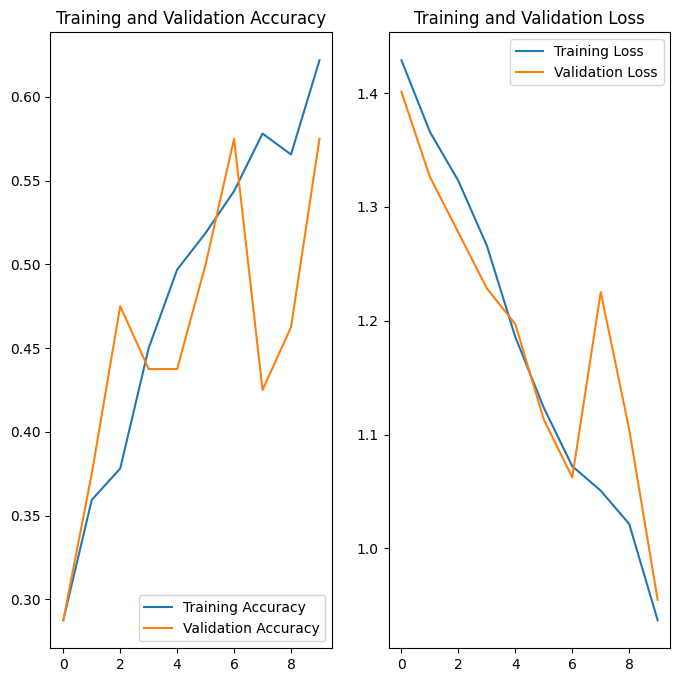

In [5]:
# prompt: Apply image classification techniques on it(conventional and CNN) to train a model that can classify vehicles from their images.

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from google.colab import drive
drive.mount('/content/drive')
base_dir = '/content/drive/MyDrive/ML/Dataset'

# Image preprocessing and augmentation
IMG_WIDTH, IMG_HEIGHT = 150, 150
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation') # set as validation data


# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
EPOCHS = 10 # Adjust as needed
history = model.fit(train_generator,
                    epochs=EPOCHS,
                    validation_data=validation_generator)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator, verbose=0)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

#Plot training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()